# Plot MPC Magnitudes

MPC Observations Database:  https://www.minorplanetcenter.net/db_search <br>

Reference: Format For Optical Astrometric Observations Of Comets, Minor Planets and Natural Satellites<br> https://www.minorplanetcenter.net/iau/info/OpticalObs.html
<br>

In [4]:
from astropy.time import Time
import matplotlib.dates as mdates
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings

def getDateTimeUT(dateOfObservation):
    yyyy = dateOfObservation[0:4]
    mm = dateOfObservation[5:7]
    dd = dateOfObservation[8:10]
    s = yyyy + '-' + mm + '-' + dd
    ff = float(dateOfObservation[10: ])
    seconds = int(ff * 86400)
    hrs = int(seconds/3600)
    mins = int((seconds - hrs * 3600)/60)
    secs = seconds  - hrs * 3600 - mins * 60
    s = s + ' '
    if (hrs < 10):
        s = s + "0"
    s = s + str(hrs) + ":"
    if (mins < 10):
        s = s + "0"
    s = s + str(mins) + ":"
    if (secs < 10):
        s = s + "0"
    s = s + str(secs)
    return s

warnings.filterwarnings("ignore")

mpcdates = []
Nmpcdates = []
Tmpcdates = []
rmpcdates = []
Bmpcdates = []
Rmpcdates = []
gmpcdates = []
Gmpcdates = []
Vmpcdates = []
Impcdates = []
ompcdates = []
cmpcdates = []
wmpcdates = []
impcdates = []
zmpcdates = []
Cmpcdates = []
nonempcdates = []

mags = []
Nmags = []
Tmags = []
rmags = []
Bmags = []
Rmags = []
gmags = []
Gmags = []
Vmags = []
Imags = []
omags = []
cmags = []
wmags = []
imags = []
zmags = []
Cmags = []
nonemags = []
magbands = []
observedbands = []
observedcatalogs = []
ccdtotaldates = []
ccdtotalmags = []
ccdnucleardates = []
ccdnuclearmags = []

satelliteObs = 0
numobs = 0
codes=[]

In [5]:
desig = 'C/2021 P4'
fullname ='C/2021 P4 (ATLAS)'
prefix = 'C2021 P4 (ATLAS)'
mpcfilename= 'C_2021_P4'
figfile =  prefix + '-MPC-mags.png'
title = fullname + ' - Magnitudes from MPC Observation Database'
print(title)
prefix + '-MPC-mags.png'
print('desig:', desig)
print('fullname:', fullname)

f = open(mpcfilename + '.txt', 'r')
print('opened ', mpcfilename + '.txt')


C/2021 P4 (ATLAS) - Magnitudes from MPC Observation Database
desig: C/2021 P4
fullname: C/2021 P4 (ATLAS)
opened  C_2021_P4.txt


In [6]:
for lines in f:
    packed = lines[0:12].strip()
    orbitType = lines[4:5].strip()
    typeOfObservation = lines[14:15].strip()
    year = int(lines[15:19])
    code = lines[77:80]
    codes.append(code)
    magnitudeBand = lines[70:71].strip()

    if (typeOfObservation == 'S'): 
        satelliteObs = satelliteObs + 1
        numobs = numobs + 1
    if ((typeOfObservation != 's') and (typeOfObservation != 'S') ):        
        numobs = numobs + 1
        dateOfObservation = lines[15:32].strip()
        datetimeUT = getDateTimeUT(dateOfObservation)
        dt = Time(datetimeUT, format='iso').datetime
        observedRA = lines[32:44].strip()
        observedDecl = lines[44:56].strip()
        observedMagnitude = lines[65:70].strip(' ')
        magnitudeBand = lines[70:71].strip()
        magbands.append(magnitudeBand)
        
        # B (default if band is not indicated)
        if ((len(magnitudeBand) == 0) and (len(observedMagnitude) > 0)):
            magnitudeBand='B'
        if (magnitudeBand not in observedbands):
            observedbands.append(magnitudeBand)
        if   ((len(observedMagnitude) > 0) and (magnitudeBand == "N")):
            Nmpcdates.append(dt)
            Nmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "T")):
            Tmpcdates.append(dt)
            Tmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "B")):
            Bmpcdates.append(dt)
            Bmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "R")):
            Rmpcdates.append(dt)
            Rmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "r")):
            rmpcdates.append(dt)
            rmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "V")):
            Vmpcdates.append(dt)
            Vmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "G")):
            Gmpcdates.append(dt)
            Gmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "g")):
            gmpcdates.append(dt)
            gmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "o")):
            ompcdates.append(dt)
            omags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "c")):
            cmpcdates.append(dt)
            cmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "w")):
            wmpcdates.append(dt)
            wmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "I")):
            Impcdates.append(dt)
            Imags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "i")):
            impcdates.append(dt)
            imags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "z")):
            zmpcdates.append(dt)
            zmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "C")):
            Cmpcdates.append(dt)
            Cmags.append(float(observedMagnitude))
        elif ( (magnitudeBand == "")):
            nonempcdates.append(dt)
            nonemags.append('')
        elif ((len(observedMagnitude) > 0) ):
            mags.append(float(observedMagnitude))
            mpcdates.append(dt)
            print('magnitudeBand', magnitudeBand, '  observedMagnitude',observedMagnitude)


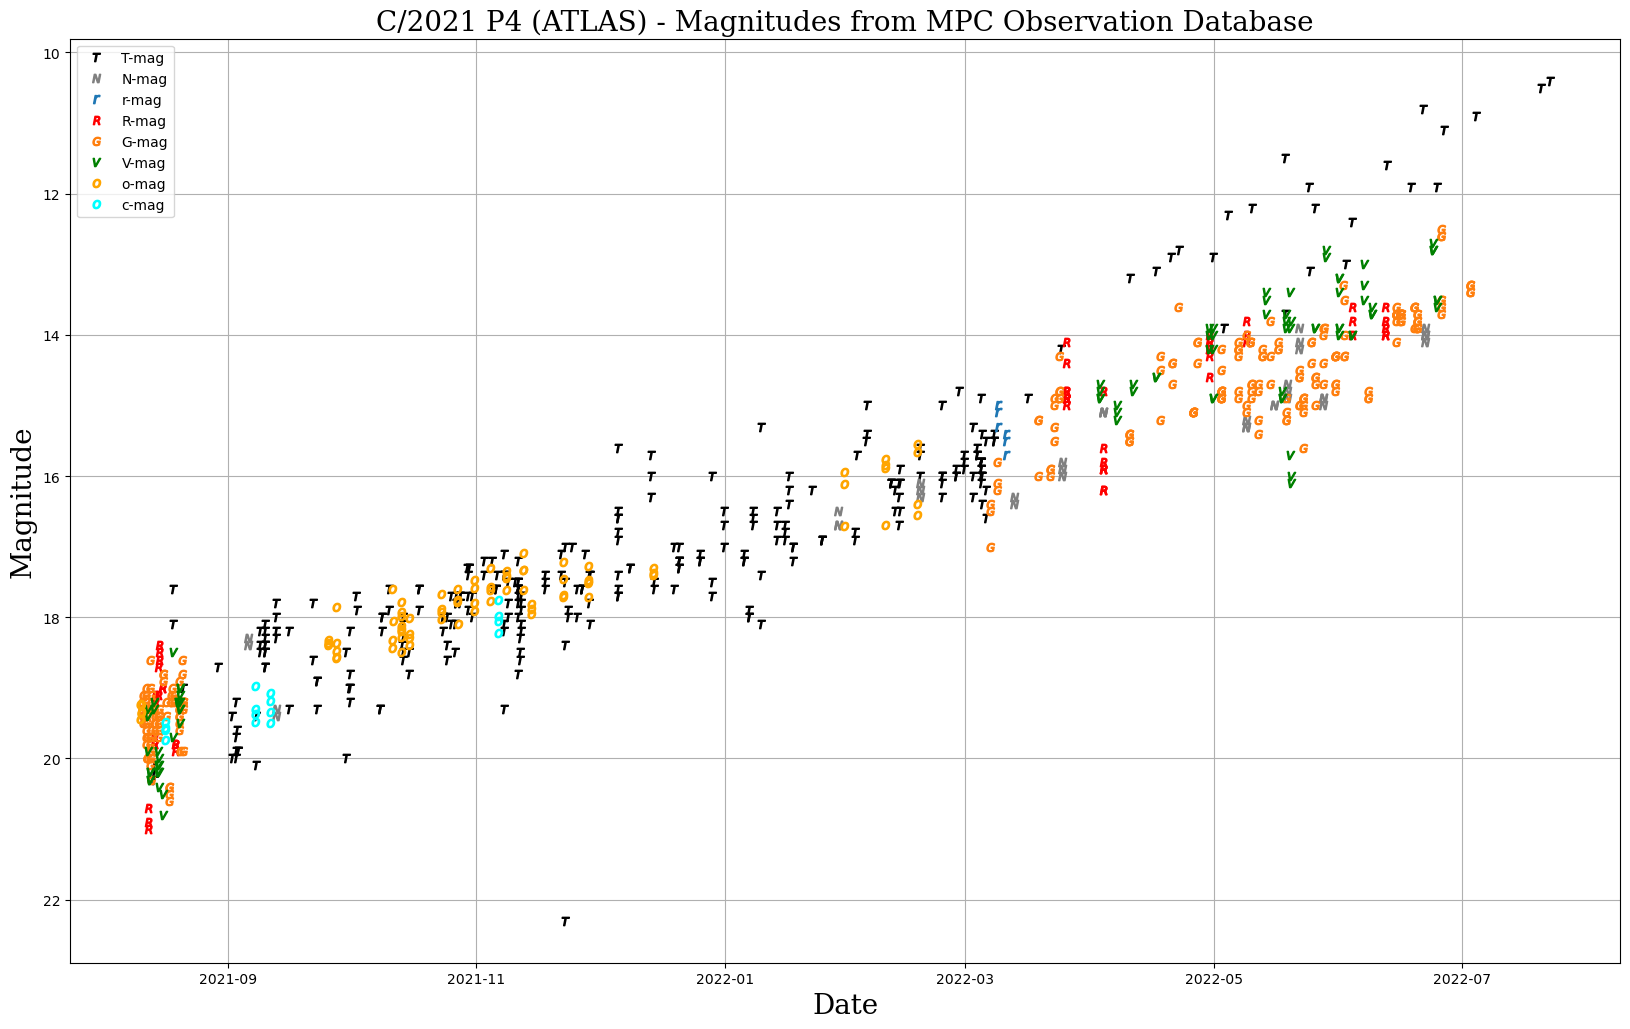

In [7]:
font1 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

boxprops = dict(boxstyle='round', facecolor='#ffffff', ec='#CCCCCC', alpha=0.9)
             
rc('text', usetex=False)
#fig, ax = plt.subplots(constrained_layout=True)
#plt.rcParams['figure.constrained_layout.use'] = True
fig, ax = plt.subplots(figsize=(20, 12))
# fig, ax = plt.subplots(figsize=(40, 12))

locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
formatter = mdates.AutoDateFormatter(locator)

#formatter = mdates.AutoDateFormatter(locator, tz=None, defaultfmt='%Y-%m-%d')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# ax.grid(b=True, which='major', axis='both')
ax.grid()
ax.set_title(title, fontdict=font1)
# fig.autofmt_xdate()

# if (len(mags) > 0):
#     ax.plot_date(mpcdates,   mags, label='mag',  marker='$?$',  xdate=True, ydate = False)
if (len(Tmags) > 0):
    ax.plot_date(Tmpcdates, Tmags, label='T-mag', color='black', fmt='.', marker='$T$', xdate=True, ydate = False)
if (len(Nmags) > 0):
    ax.plot_date(Nmpcdates, Nmags, label='N-mag', color='grey', fmt='.', marker='$N$', xdate=True, ydate = False)
if (len(rmags) > 0):
    ax.plot_date(rmpcdates, rmags, label='r-mag', fmt='.', marker='$r$', xdate=True, ydate = False)
if (len(Bmags) > 0):
    ax.plot_date(Rmpcdates, Rmags, label='B-mag', color='blue', fmt='.', marker='$B$', xdate=True, ydate = False)
if (len(Rmags) > 0):
    ax.plot_date(Rmpcdates, Rmags, label='R-mag', color='red', fmt='.', marker='$R$', xdate=True, ydate = False)
if (len(gmags) > 0):
    ax.plot_date(gmpcdates, gmags, label='g-mag', fmt='.', marker='$g$', xdate=True, ydate = False)
if (len(Gmags) > 0):
    ax.plot_date(Gmpcdates, Gmags, label='G-mag', fmt='.', marker='$G$', xdate=True, ydate = False)
if (len(Vmags) > 0):
    ax.plot_date(Vmpcdates, Vmags, label='V-mag', color='green', fmt='.', marker='$V$', xdate=True, ydate = False)
if (len(omags) > 0):
    ax.plot_date(ompcdates, omags, label='o-mag', color='orange', fmt='.', marker='$o$', xdate=True, ydate = False)
if (len(cmags) > 0):
    ax.plot_date(cmpcdates, cmags, label='c-mag', color='cyan', fmt='.', marker='$o$', xdate=True, ydate = False)
if (len(Imags) > 0):
    ax.plot_date(Impcdates, Imags, label='I-mag', marker='$I$', fmt='.', xdate=True, ydate = False)
if (len(imags) > 0):
    ax.plot_date(impcdates, imags, label='i-mag', fmt='.', marker='$i$', xdate=True, ydate = False)
if (len(zmags) > 0):
    ax.plot_date(zmpcdates, zmags, label='z-mag', fmt='.', marker='$z$', xdate=True, ydate = False)
if (len(wmags) > 0):
    ax.plot_date(wmpcdates, wmags, label='w-mag', fmt='.', marker='$w$', xdate=True, ydate = False)
if (len(Cmags) > 0):
    ax.plot_date(Cmpcdates, Cmags, label='C-mag', fmt='.', marker='$C$', xdate=True, ydate = False)


plt.xlabel('Date', fontdict=font1)
plt.gca().invert_yaxis()
plt.ylabel('Magnitude', fontdict=font1)
ax.legend(loc=0)
plt.savefig(figfile)
plt.show()


The plot reveals the history of observations of this object going back to 2021 when it was discovered:<br>


## Discovery and discovery asterisk * 

An asterisk * is used to denote discovery observation. Observations before the asterisk, if any, are called prediscovery observations.<br>
Reference:<br>
Format For Optical Astrometric Observations Of Comets, Minor Planets and Natural Satellites<br>
From the detailed notes section:<br>
<p>
DISCOVERY ASTERISK<br>
Discovery observations for new (or unidentified) objects should contain `*' in column 13. Only one asterisked observation per object is expected.
</p>


In [8]:
f = open(mpcfilename + '.txt', 'r')

print('opened ', mpcfilename + '.txt')

for lines in f:
    if '*' in lines:
        print('discoveryasterisk found:\n',lines)
        discoveryasterisk = lines[12:13]
        print(discoveryasterisk)
        packed = lines[0:12].strip()
        orbitType = lines[4:5].strip()
        typeOfObservation = lines[14:15].strip()

        dateOfObservation = lines[15:32].strip()
        datetimeUT = getDateTimeUT(dateOfObservation)
        dt = Time(datetimeUT, format='iso').datetime
        observedRA = lines[32:44].strip()
        observedDecl = lines[44:56].strip()
        observedMagnitude = lines[65:70].strip(' ')
        magnitudeBand = lines[70:71].strip()
        code=lines[77:80]
        print('Discovery Circumstances:')
        print('MPC dateOfObservation', dateOfObservation)
        print('datetimeUT', datetimeUT)
        print('observedRA', observedRA)
        print('observedDecl', observedDecl)
        print('observedMagnitude', observedMagnitude)
        print('magnitudeBand', magnitudeBand)
        # B (default if band is not indicated),
        if (len(magnitudeBand) == 0):
            print('magnitudeBand is blank, which means the magnitude Band is B')
        print('Station Code', code)
f.close()

opened  C_2021_P4.txt
discoveryasterisk found:
     CK21P040* C2021 08 10.53716801 06 54.69 +55 52 13.6          19.44oV#06FWT05

*
Discovery Circumstances:
MPC dateOfObservation 2021 08 10.537168
datetimeUT 2021-08-10 12:53:31
observedRA 01 06 54.69
observedDecl +55 52 13.6
observedMagnitude 19.44
magnitudeBand o
Station Code T05


In [9]:
print('observedbands', observedbands)

print('There should be no unknown bands')
print( 'unknown band mags', len(mags))
print('Nmags', len(Nmags))
print('Tmags', len(Tmags))
print('Bmags', len(Bmags))
print('Rmags', len(Rmags))
print('rmags', len(rmags))
print('gmags', len(gmags))
print('Gmags', len(Gmags))
print('Vmags', len(Vmags))
print('omags', len(omags))
print('cmags', len(cmags))
print('wmags', len(wmags))
print('Imags', len(Imags))
print('imags', len(imags))
print('zmags', len(zmags))
print('wmags', len(wmags))
print('Cmags', len(Cmags))

print('Total number of ground based observations with no reported magnitude', len(nonemags))
#nummagobs = len(Nmags)) + len(Tmags)) + len(Rmags)) + len(rmags)) + len(gmags)) +len(Gmags)) + len(Vmags)) + len(omags)) + len(cmags)) + len(wmags)) + len(Imags))
nummagobs = len(Nmags) + len(Tmags) + len(Rmags) + len(rmags) + len(gmags) +len(Gmags) + len(Vmags) + len(omags) + len(cmags) + len(wmags) + len(Imags)
print('Number of satellite observations (no reported magnitudes)', satelliteObs)
print('Total number of ground based observations with reported magnitudes', nummagobs)
print('Total number of astrometric observations', numobs)
print('Station codes:', np.unique(codes))

observedbands ['o', 'G', 'R', 'V', 'T', '', 'c', 'N', 'r']
There should be no unknown bands
unknown band mags 0
Nmags 36
Tmags 298
Bmags 0
Rmags 54
rmags 6
gmags 0
Gmags 263
Vmags 88
omags 80
cmags 16
wmags 0
Imags 0
imags 0
zmags 0
wmags 0
Cmags 0
Total number of ground based observations with no reported magnitude 77
Number of satellite observations (no reported magnitudes) 50
Total number of ground based observations with reported magnitudes 841
Total number of astrometric observations 968
Station codes: ['033' '104' '130' '157' '203' '204' '213' '215' '247' '349' '367' '568'
 '595' '658' '900' '903' '970' 'A17' 'A77' 'A98' 'B49' 'B72' 'B96' 'C10'
 'C23' 'C36' 'C43' 'C47' 'C53' 'C77' 'C82' 'C95' 'D88' 'F65' 'G00' 'G06'
 'G18' 'G23' 'G34' 'G40' 'H06' 'H21' 'I72' 'I81' 'I89' 'J04' 'J95' 'K38'
 'K51' 'K77' 'K78' 'K80' 'K83' 'K87' 'L01' 'L06' 'L27' 'L47' 'L59' 'L63'
 'M09' 'M18' 'Q11' 'Q21' 'T05' 'T08' 'U83' 'V16' 'Z05' 'Z10' 'Z41' 'Z99']
